#Séries Temporais: Parte 1 - Análise Exploratória.

Série temporal é um conjunto de dados que possui um espaçamento de tempo regular entre eles, podendo ser de hora em hora, dia a dia, mês a mês...

Técnicas de Regressão Linear costumam não ser utéis para esse tipo de analise pois desconsideram a dimensão do tempo e seus efeitos de sazonalidade.

##Importando as Bibliotecas Necessárias:

Aqui importaremos algumas das bibliotecas essenciais para manipulação de dados.

In [0]:
#@title
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [2]:
# importar pacotes e setar configurações de plots
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style()

%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


##Importando o Primeiro Dataset:

O Dataset disponibilizado pelo Professor Carlos Melo se refere ao consumo de energia elétrica ao decorrer dos mêses.

In [0]:
#url do dataset
dataset_path = "https://raw.githubusercontent.com/carlosfab/escola-data-science/master/datasets/electricity_consumption/Electric_Production.csv"

#importar o csv para um dataframe
df = pd.read_csv(dataset_path)

In [4]:
#ver as 5 primeiras entradas
df.head()

,DATE,Value
0,01-01-1985,72.5052
1,02-01-1985,70.6720
2,03-01-1985,62.4502
3,04-01-1985,57.4714
4,05-01-1985,55.3151


In [5]:
#Verificando os tipos das variáveis:
df.dtypes

DATE      object
Value    float64
dtype: object

###Corrigindo a Formatação de DATE:

A Data original do Dataset não é executada em diversas funções devido à não padronização dos formatos de Data que temos existentes na atualidade. Para isso, precisamos converter e padronizar para o formato ANO-MÊS-DIA.

Utilizamos a função do Pandas chamada de "to_datetime", em que ela precisa receber um formato de Data para conseguir processar a String.

Cado dado é indicado por "%" e sua sigla em sequência:

* `%m` - Indica mês;
* `%d `- Indica Dia;
* `%y `- Indica ano com 2 dígitos;
* `%Y `- Indica ano com 4 dígitos;
* `%M `- Indica minuto;
* `%H `- Indica Hora;

In [0]:
#Convertendo DATE para datetime para ser settado no Index do DataFrame:
df.index = pd.to_datetime(df.DATE, format = "%m-%d-%Y")

#Retirando a coluna DATE para não ficar repetido:
df.drop("DATE", axis = 1, inplace=True)

In [7]:
#verificando as 5 primeiras entradas:
df.head()

,Value
DATE,
1985-01-01,72.5052
1985-02-01,70.6720
1985-03-01,62.4502
1985-04-01,57.4714
1985-05-01,55.3151


Ao utilizar a função "to_datetime" podemos reparar que a ordem dos valores apresentados alteram, antes de utiliza-la os valores apresentados estavam no formato mês-dia-ano, após a utilização recebemos o formato em ano-mês-dia.

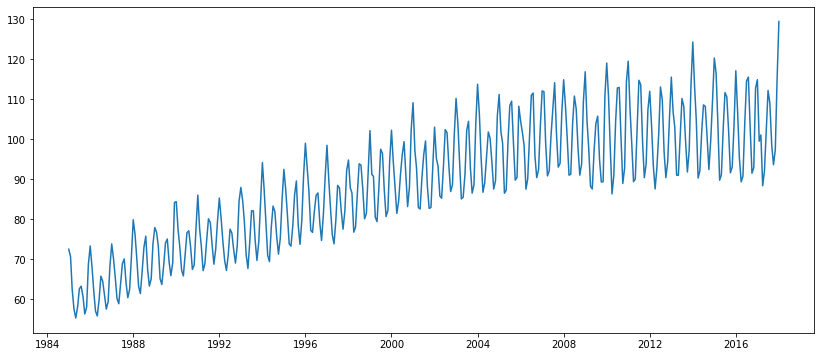

In [8]:
fig, ax = plt.subplots (figsize = (14,6))

plt.plot(df.index, df.Value)

plt.show();

###Decompondo os Componentes da Série Temporal:

Em uma série Temporal temos 3 principais componentes que definem o comportamento dela:

* **Tendência** - Se traçarmos uma linha entre os valores médio, percebemos um movimento Crescente, Decrescente ou nulo?

* **Sazonalidade** - determinado de movimento Cíclico relativo ao Tempo. O consumo de energia pode diminuir ou aumentar em determinada hora do dia ou em determinada epóca do ano.

* **Residual** - Ou definido como ruído, são as pequenas alterações que não são determinadas pelos métodos anteriores.

####Importando a Biblioteca Necessária:

Para determinarmos esses componentes de uma série temporal utilizados uma biblioteca chamada de statsmodels.

In [0]:
from statsmodels.tsa.seasonal import seasonal_decompose

####Verificando o que essa função retorna:

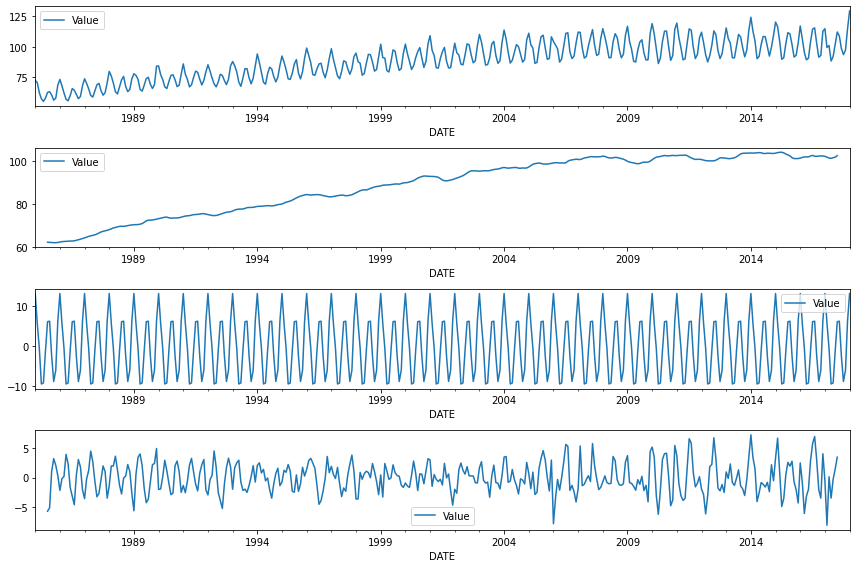

In [10]:
resultado = seasonal_decompose(df)

fig, (ax1, ax2, ax3 , ax4) = plt.subplots (4, 1, figsize=(12,8))

resultado.observed.plot(ax = ax1)
resultado.trend.plot(ax = ax2)
resultado.seasonal.plot(ax = ax3)
resultado.resid.plot(ax = ax4)

plt.tight_layout();

Procurei o motivo dessa bagunça criada pelo matplotlib e, no StackOverFlow, foi mencionado que a autalização do Matplotlib ser tornou incompativel com a versão atual do Pandas.

##Importando o Segundo DataSet:

Nesse segundo momento, utilizaremos um Dataset que mostra a quantidade de pessoas que utilizaram o serviço ferroviário em um determinado período.

Esse Dataset contém a Data com o formato em Horas para aprendermos essa manipulação.

In [0]:
#Link do Dataset:
ferroviaria_dataset = "https://github.com/carlosfab/escola-data-science/raw/master/datasets/companhia_ferroviaria/trem.csv"

#Importar os dados da empresa ferroviária
df_trem = pd.read_csv(ferroviaria_dataset)

In [12]:
#Vendo os primeiros 5 termos desse Dataset:
df_trem.head()

,ID,Datetime,Count
0,0,25-08-2012 00:00,8
1,1,25-08-2012 01:00,2
2,2,25-08-2012 02:00,6
3,3,25-08-2012 03:00,2
4,4,25-08-2012 04:00,2


###Corrigindo a Formatação de Datetime com horas:

Observamos que o formato atual do Datetime é DIA-MES-ANO HORAS-MINUTOS e, para que possamos utilizar essa Data no futuro, utilizamos a seguinte formatação:

`format = "%d-%m-%Y %H:%M"`, em que:

* `%d`- Representa dia;
* `%m `- Representa mês;
* `%Y `- Representa ano com 4 digitos;
* `%H `- Representa Horas;
* `%M `- Representa Minutos;

In [13]:
#Formatando Datetime para o padrão correto:
df_trem.Datetime = pd.to_datetime(df_trem.Datetime, format = "%d-%m-%Y %H:%M")

#Imprimindo os 5 primeiros valores:
df_trem.head()

,ID,Datetime,Count
0,0,2012-08-25 00:00:00,8
1,1,2012-08-25 01:00:00,2
2,2,2012-08-25 02:00:00,6
3,3,2012-08-25 03:00:00,2
4,4,2012-08-25 04:00:00,2


In [0]:
#Setando o Index como o Datetime:
df_trem.index = df_trem.Datetime

###Plotando Gráfico do Quantitativo de Clientes:

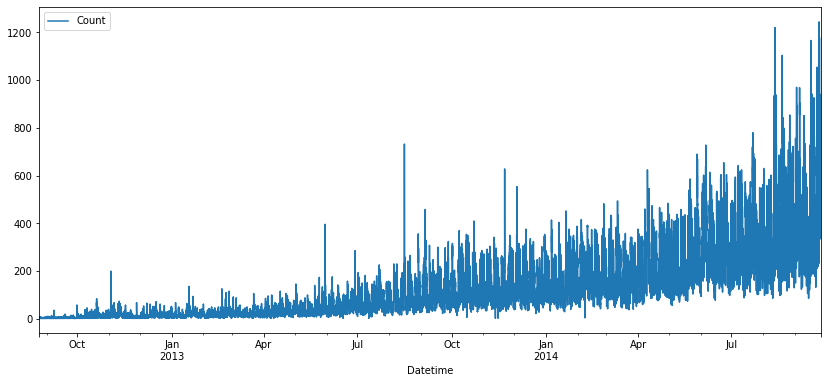

In [15]:
#Criando a figura com o pyplot:
fig, ax = plt.subplots(figsize = (14,6))

df_trem.plot(x = 'Datetime', y ='Count', ax = ax);

Podemos observar alguns determinados picos, que podem indicar algumas hipoteses para o comportamento, tais como:

1. Pessoas viajam mais durante a semana.
2. Há horários de pico por causa das indas e vindas do trabalho.
3. Há períodos do mês onde a demanda por transporte é maior.


###Criando Variáveis de tempo para o novo Dataset:

Utilizando o formato Datetime podemos pegar algumas informações específicas como ano, mês, dia, hora e dia da semana, por exemplo.

Há ainda a possibilidade de "criar" ou identificar o consumo nos finais de semana utilizando outra variável: `day_of_week`.

In [0]:
#Criando novas colunas no Dataset contendo informações relativa ao tempo:
df_trem['year'] = df_trem.Datetime.dt.year
df_trem['month'] = df_trem.Datetime.dt.month
df_trem['day'] = df_trem.Datetime.dt.day
df_trem['hour'] = df_trem.Datetime.dt.hour
df_trem['day_of_week'] = df_trem.Datetime.dt.dayofweek

Uma vez que o atributo `.dayofweek` retorna uma lista com os dias da semana, podemos aproveita-la para identificar se determinada data é um final de semana ou não.

**`dayofweek` retorna a seguinte lista:**

[ 0 , 1 , 2 , 3 , 4 , 5 , 6 ] , onde:

[seg, ter, qua, qui, sex, sab, dom]

In [17]:
df_trem['weekend'] = 0
df_trem.loc[(df_trem.day_of_week==5) | (df_trem.day_of_week==6), 'weekend'] = 1
df_trem.sample(5)

,ID,Datetime,Count,year,month,day,hour,day_of_week,weekend
Datetime,,,,,,,,,
2013-08-02 14:00:00,8222,2013-08-02 14:00:00,98,2013,8,2,14,4,0
2012-10-26 07:00:00,1495,2012-10-26 07:00:00,4,2012,10,26,7,4,0
2013-05-10 10:00:00,6202,2013-05-10 10:00:00,18,2013,5,10,10,4,0
2012-11-16 09:00:00,2001,2012-11-16 09:00:00,30,2012,11,16,9,4,0
2014-02-10 08:00:00,12824,2014-02-10 08:00:00,244,2014,2,10,8,0,0


###Gráfico dos Componentes da Série Temporal:

Continuando a manipulação dos dados, podemos ver a seguinte figura contendo a tendência, sazonalidade e residuo da Série Temporal:

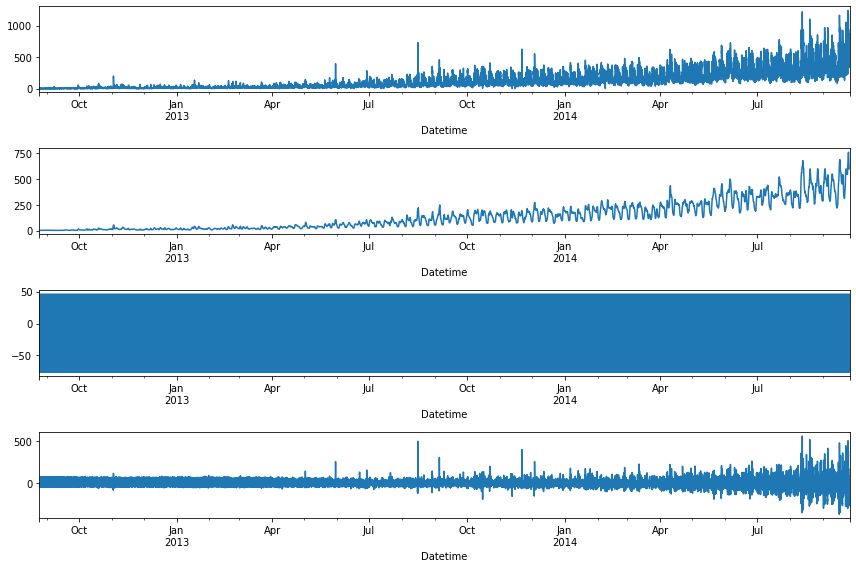

In [18]:
resultado = seasonal_decompose(df_trem.Count)

fig, (ax1, ax2, ax3 , ax4) = plt.subplots (4, 1, figsize=(12,8))

resultado.observed.plot(ax = ax1)
resultado.trend.plot(ax = ax2)
resultado.seasonal.plot(ax = ax3)
resultado.resid.plot(ax = ax4)

plt.tight_layout();

###Gráfico do Consumo médio por Dia da Semana:

Além dos gráficos dos componentes da série temporal, podemos ainda verificar o consumo médio em determinados intervalos de tempo.

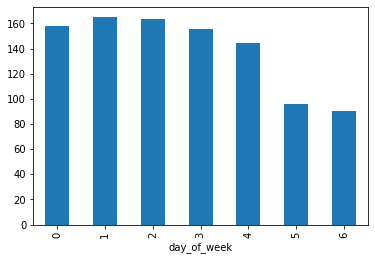

In [19]:
df_trem.groupby('day_of_week').Count.mean().plot.bar();

###Gráfico do Consumo médio por Horas do dia:

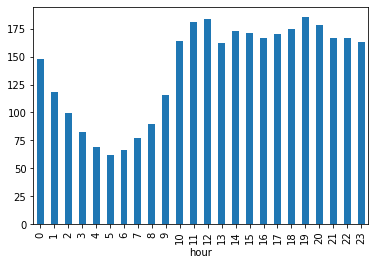

In [20]:
df_trem.groupby('hour').Count.mean().plot.bar();